# Task2

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import os
import tweepy as tw
import networkx as nx
import nltk
from nltk import bigrams
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import collections
import re
import warnings
warnings.filterwarnings("ignore")
nltk.download('punkt')
sns.set(font_scale=1.5)
sns.set_style("whitegrid")

import glob


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mraka\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
path = "P:\FDA project 3\Data\elonmusk data"
directory_files = glob.glob(path + "/*.csv")
directory_files

['P:\\FDA project 3\\Data\\elonmusk data\\2017.csv',
 'P:\\FDA project 3\\Data\\elonmusk data\\2018.csv',
 'P:\\FDA project 3\\Data\\elonmusk data\\2019.csv',
 'P:\\FDA project 3\\Data\\elonmusk data\\2020.csv',
 'P:\\FDA project 3\\Data\\elonmusk data\\2021.csv',
 'P:\\FDA project 3\\Data\\elonmusk data\\2022.csv']

In [3]:
content =[]
for file in directory_files:
    elon_data = pd.read_csv(file, index_col=None)
    content.append(elon_data)
df_task2_1 = pd.concat(content)
df_task2 = df_task2_1[['date','tweet']]
df_task2['date'] = pd.to_datetime(df_task2['date'])
df_task2 = df_task2.rename(columns={'tweet':'Words'})
df_task2['year'] = df_task2['date'].dt.year
df_task2 =df_task2.drop("date", axis='columns')

In [4]:
# lower the words
df_task2['Words']=df_task2['Words'].str.lower()
df_task2

,Words,year
0,@neilsiegel @tesla coming very soon,2017
1,@kreative vastly better maps/nav coming soon,2017
2,@dd_hogan ok,2017
3,@jason @tesla sure,2017
4,"@kabirakhtar yeah, it’s terrible. had to upgra...",2017
...,...,...
1023,https://t.co/la9hpzvlgx,2022
1024,let’s make the roaring 20’s happen!,2022
1025,great work by tesla team worldwide!,2022
1026,@blkmdl3 @tesla 🔥,2022


In [5]:
df_task2['year'].nunique()

13

## 1. Compute word frequencies for each year. Exclude the stop words

In [6]:
# import stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
print(stop_words)

{'doing', 'am', 'yours', 'have', 'hadn', 'from', 'on', 'under', 'had', 'than', "won't", 'again', 'you', 'hasn', 'it', 'where', 'now', "you'll", 'her', 'o', 'we', 'these', 'wasn', "weren't", 'won', 'not', 'about', 'more', 'very', 'were', 'no', 'the', "you'd", 'each', 'most', 'doesn', 'such', 'shouldn', 'which', 'its', 'their', 'if', 'just', 'of', 'own', 'm', 'his', 'hers', "you're", "shan't", 'whom', 'does', 'when', 'over', 'but', 'y', "she's", 'couldn', 'll', "hadn't", "haven't", "didn't", 'mightn', "mightn't", "wasn't", 'my', 'what', 's', 'do', "aren't", 'at', 'can', 'by', 'before', 'needn', 'only', 'after', 'or', "hasn't", 'any', 'ours', 'while', 'both', 'off', 'all', 'shan', 'ourselves', "mustn't", 'once', 'ma', 'further', 'those', 'then', 'ain', "needn't", "wouldn't", 'who', 'mustn', 'did', 'theirs', 'that', 'has', "couldn't", 'having', 'against', 'myself', 'above', 'itself', 'him', 'is', 'to', 'with', 'an', 'being', 'she', 'some', "it's", 'aren', "that'll", 'should', 'nor', 'are',

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mraka\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
# use stopwords to clean words
def clean_stop(text):
    return " ".join([word for word in str(text).split() if word not in stop_words])
df_task2['Words'] = df_task2['Words'].apply(lambda text: clean_stop(text))

In [8]:
# clean punctuation marks
need2rm="@.[],:;&’!)(?🔥🤣”3…'“[]1234567890$__💯/✌️"
def rm_char(original_str, need2rm):
    ''' Remove charecters in "need2rm" from "original_str" '''
    return original_str.translate(str.maketrans('','',need2rm))
df_task2['Words'] = df_task2['Words'].apply(lambda original_str: rm_char(original_str, need2rm))

In [9]:
df_task2

,Words,year
0,neilsiegel tesla coming soon,2017
1,kreative vastly better mapsnav coming soon,2017
2,ddhogan ok,2017
3,jason tesla sure,2017
4,kabirakhtar yeah its terrible upgrade old linu...,2017
...,...,...
1023,httpstcolahpzvlgx,2022
1024,lets make roaring s happen,2022
1025,great work tesla team worldwide,2022
1026,blkmdl tesla,2022


calculate the frequcny by year

In [10]:
# count words for 2017
df_f2017 = df_task2[df_task2['year'] == 2017]
df_f2017= df_f2017['Words'].str.cat(sep=' ')
wds = nltk.tokenize.word_tokenize(df_f2017)
df_f2017=pd.DataFrame(nltk.FreqDist(wds).items(),columns=['Word', 'Counts']).sort_values(by='Counts',ascending=False)
# Calculating frequency 
df_f2017['frequency']= (df_f2017['Counts'] / df_f2017['Counts'].sum()) 
df_f2017

,Word,Counts,frequency
133,amp,258,0.008508
1,tesla,234,0.007717
67,model,177,0.005837
184,yes,162,0.005342
77,good,159,0.005243
...,...,...,...
1996,for,3,0.000099
1997,highs,3,0.000099
1998,lows,3,0.000099
1999,unrelenting,3,0.000099


In [11]:
# count words for 2018
df_f2018 = df_task2[df_task2['year'] == 2018]
df_f2018= df_f2018['Words'].str.cat(sep=' ')
wds = nltk.tokenize.word_tokenize(df_f2018)
df_f2018=pd.DataFrame(nltk.FreqDist(wds).items(),columns=['Word', 'Counts']).sort_values(by='Counts',ascending=False)

# Calculating frequency
df_f2018['frequency']= (df_f2018['Counts'] / df_f2018['Counts'].sum()) 
df_f2018


,Word,Counts,frequency
22,amp,1575,0.021978
3,tesla,1345,0.018768
142,car,357,0.004982
36,yes,321,0.004479
236,good,305,0.004256
...,...,...,...
3616,other,3,0.000042
3613,competed,3,0.000042
3612,globally,3,0.000042
3611,stevesi,3,0.000042


In [12]:
# count words for 2019
df_f2019 = df_task2[df_task2['year'] == 2019]
df_f2019= df_f2019['Words'].str.cat(sep=' ')
wds = nltk.tokenize.word_tokenize(df_f2019)
df_f2019=pd.DataFrame(nltk.FreqDist(wds).items(),columns=['Word', 'Counts']).sort_values(by='Counts',ascending=False)
# Calculating frequency
df_f2019['frequency']= (df_f2019['Counts'] / df_f2019['Counts'].sum()) 
df_f2019

,Word,Counts,frequency
236,tesla,1130,0.022151
13,amp,961,0.018838
130,erdayastronaut,520,0.010193
201,spacex,427,0.008370
148,flcnhvy,364,0.007135
...,...,...,...
6917,realrickyreeves,1,0.000020
6918,extensive,1,0.000020
6919,prove,1,0.000020
6920,exhibit,1,0.000020


In [13]:
# count words for 2020
df_f2020 = df_task2[df_task2['year'] == 2020]
df_f2020= df_f2020['Words'].str.cat(sep=' ')
wds = nltk.tokenize.word_tokenize(df_f2020)
df_f2020=pd.DataFrame(nltk.FreqDist(wds).items(),columns=['Word', 'Counts']).sort_values(by='Counts',ascending=False)
# Calculating frequency
df_f2020['frequency']= (df_f2020['Counts'] / df_f2020['Counts'].sum()) 
df_f2020
# df_f2020['Counts'].sum()

,Word,Counts,frequency
40,amp,575,0.019552
12,tesla,345,0.011731
153,erdayastronaut,247,0.008399
113,flcnhvy,239,0.008127
22,ppathole,225,0.007651
...,...,...,...
4006,bernard,1,0.000034
4004,distract,1,0.000034
4001,httpstcotzbktiv,1,0.000034
4000,greensustainable,1,0.000034


In [14]:
# count words for 2021
df_f2021 = df_task2[df_task2['year'] == 2021]
df_f2021= df_f2021['Words'].str.cat(sep=' ')
wds = nltk.tokenize.word_tokenize(df_f2021)
df_f2021=pd.DataFrame(nltk.FreqDist(wds).items(),columns=['Word', 'Counts']).sort_values(by='Counts',ascending=False)
# Calculating frequency
df_f2021['frequency']= (df_f2021['Counts'] / df_f2021['Counts'].sum()) 
df_f2021

,Word,Counts,frequency
48,amp,473,0.018393
65,tesla,322,0.012521
381,spacex,246,0.009566
159,wholemarsblog,189,0.007349
458,teslaownerssv,119,0.004627
...,...,...,...
3566,teslatruckclub,1,0.000039
3567,retrained,1,0.000039
3569,tuning,1,0.000039
3571,httpstcolwgkecjp,1,0.000039


In [15]:
# count words for 2022
df_f2022 = df_task2[df_task2['year'] == 2022]
df_f2022= df_f2022['Words'].str.cat(sep=' ')
wds = nltk.tokenize.word_tokenize(df_f2022)
df_f2022=pd.DataFrame(nltk.FreqDist(wds).items(),columns=['Word', 'Counts']).sort_values(by='Counts',ascending=False)
# Calculating frequency
df_f2022['frequency']= (df_f2022['Counts'] / df_f2022['Counts'].sum())
df_f2022

,Word,Counts,frequency
78,tesla,108,0.015250
314,wholemarsblog,84,0.011861
50,amp,80,0.011296
46,spacex,56,0.007907
5,teslaownerssv,50,0.007060
...,...,...,...
874,air,2,0.000282
872,airliners,2,0.000282
871,commercial,2,0.000282
870,deployment,2,0.000282


## 2. Show top 10 words (for each year) by the highest value of word frequency

In [16]:
df_f2017_top=df_f2017.nlargest(10,['frequency'])
df_f2017_top

,Word,Counts,frequency
133,amp,258,0.008508
1,tesla,234,0.007717
67,model,177,0.005837
184,yes,162,0.005342
77,good,159,0.005243
211,spacex,153,0.005046
47,like,147,0.004848
75,one,138,0.004551
22,first,129,0.004254
63,next,129,0.004254


In [17]:
df_f2018_top=df_f2018.nlargest(10,['frequency'])
df_f2018_top

,Word,Counts,frequency
22,amp,1575,0.021978
3,tesla,1345,0.018768
142,car,357,0.004982
36,yes,321,0.004479
236,good,305,0.004256
166,model,294,0.004102
170,its,285,0.003977
132,like,282,0.003935
324,spacex,264,0.003684
354,would,228,0.003182


In [18]:
df_f2019_top=df_f2019.nlargest(10,['frequency'])
df_f2019_top

,Word,Counts,frequency
236,tesla,1130,0.022151
13,amp,961,0.018838
130,erdayastronaut,520,0.010193
201,spacex,427,0.008370
148,flcnhvy,364,0.007135
127,yes,307,0.006018
128,its,233,0.004567
154,would,194,0.003803
232,great,193,0.003783
131,teslaownerssv,182,0.003568


In [19]:
df_f2020_top=df_f2020.nlargest(10,['frequency'])
df_f2020_top

,Word,Counts,frequency
40,amp,575,0.019552
12,tesla,345,0.011731
153,erdayastronaut,247,0.008399
113,flcnhvy,239,0.008127
22,ppathole,225,0.007651
422,spacex,206,0.007005
86,yes,160,0.005441
130,its,139,0.004726
30,great,128,0.004352
5018,thirdrowtesla,123,0.004182


In [20]:
df_f2021_top=df_f2021.nlargest(10,['frequency'])
df_f2021_top

,Word,Counts,frequency
48,amp,473,0.018393
65,tesla,322,0.012521
381,spacex,246,0.009566
159,wholemarsblog,189,0.007349
458,teslaownerssv,119,0.004627
39,ppathole,116,0.004511
386,erdayastronaut,111,0.004316
88,great,102,0.003966
198,good,98,0.003811
140,much,93,0.003616


In [21]:
df_f2022_top=df_f2022.nlargest(10,['frequency'])
df_f2022_top

,Word,Counts,frequency
78,tesla,108,0.015250
314,wholemarsblog,84,0.011861
50,amp,80,0.011296
46,spacex,56,0.007907
5,teslaownerssv,50,0.007060
792,sawyermerritt,36,0.005083
68,people,34,0.004801
134,yes,32,0.004518
75,would,30,0.004236
793,billymk,30,0.004236


## 3. Plot histogram of word frequencies for each year

Text(0.5, 93.24999999999997, 'Frequency')

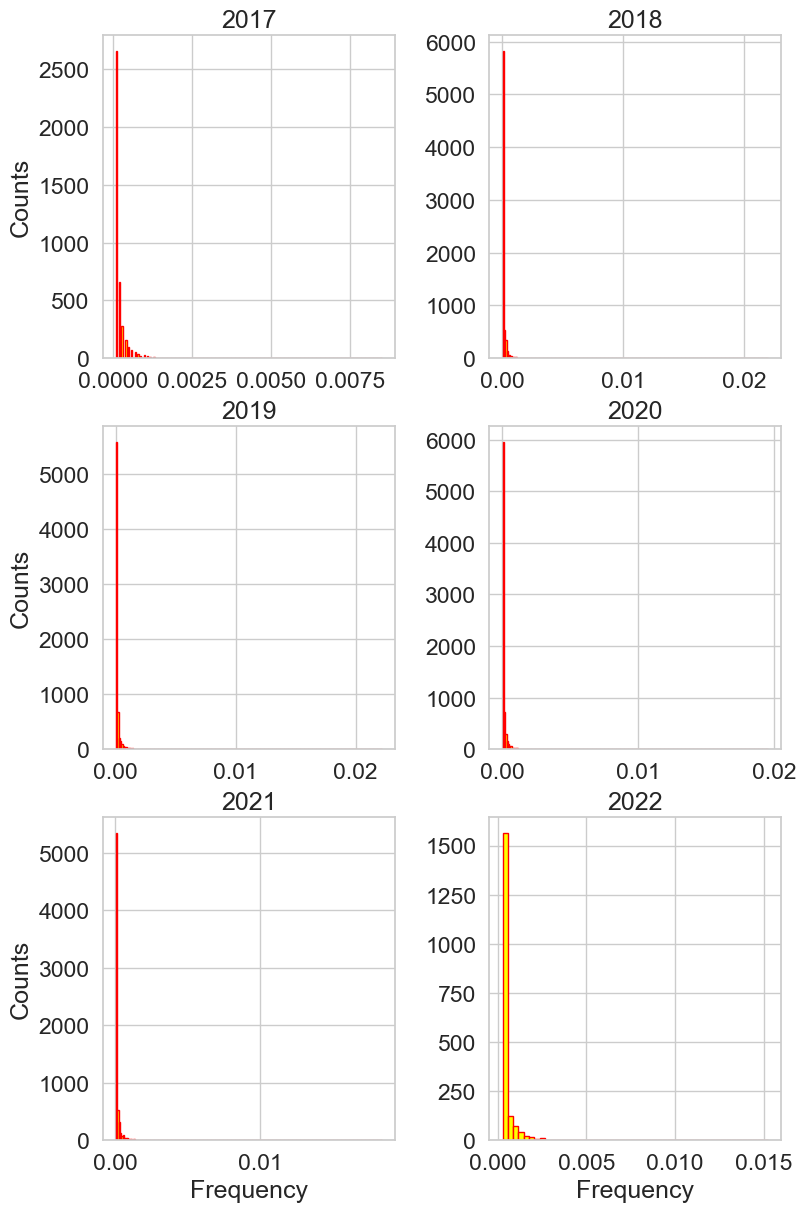

In [22]:
import  matplotlib.pyplot as plt
import numpy as np 
# plt.figure(figsize=(10,10), dpi=100)

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(8, 12))
fig.tight_layout() # Or equivalently,  "plt.tight_layout()"

ax1 = plt.subplot(321)
ax1.hist(df_f2017['frequency'],bins=200,edgecolor ='red',facecolor ='yellow',)
# ax1.set_xlim(0, 2)
ax1.set_title('2017')
ax1.set_ylabel('Counts')

ax2 = plt.subplot(322)
ax2.hist(df_f2018['frequency'],bins=200,edgecolor ='red',facecolor ='yellow')
# ax2.set_xlim(0, 2)
ax2.set_title('2018')

ax3 = plt.subplot(323)
ax3.hist(df_f2019['frequency'],bins=200,edgecolor ='red',facecolor ='yellow')
# ax3.set_xlim(0, 2)
ax3.set_title('2019')
ax3.set_ylabel('Counts')

ax4 = plt.subplot(324)
ax4.hist(df_f2020['frequency'],bins=200,edgecolor ='red',facecolor ='yellow')
# ax4.set_xlim(0, 2)
ax4.set_title('2020')

ax5 = plt.subplot(325)
ax5.hist(df_f2021['frequency'],bins=200,edgecolor ='red',facecolor ='yellow')
# ax5.set_xlim(0, 2)
ax5.set_title('2021')
ax5.set_ylabel('Counts')
ax5.set_xlabel('Frequency')

ax6 = plt.subplot(326)
ax6.hist(df_f2022['frequency'],bins=50,edgecolor ='red',facecolor ='yellow')
# ax6.set_xlim(0, 2)
ax6.set_title('2022')
ax6.set_xlabel('Frequency')


## 4. Use Zipf’s law and plot log-log plots of word frequencies and rank for each year

In [23]:
#  get the rank of 2017
rank= []
i=0
while  i < len(df_f2017):
  rank.append(i+1)
  i += 1
df_f2017['rank']=rank
df_f2017.head(2)

,Word,Counts,frequency,rank
133,amp,258,0.008508,1
1,tesla,234,0.007717,2


In [24]:
#  get the rank of 2018
rank= []
i=0
while  i < len(df_f2018):
  rank.append(i+1)
  i += 1
df_f2018['rank']=rank
df_f2018.head(2)

,Word,Counts,frequency,rank
22,amp,1575,0.021978,1
3,tesla,1345,0.018768,2


In [25]:
#  get the rank of 2019
rank= []
i=0
while  i < len(df_f2019):
  rank.append(i+1)
  i += 1
df_f2019['rank']=rank
df_f2019.head(2)

,Word,Counts,frequency,rank
236,tesla,1130,0.022151,1
13,amp,961,0.018838,2


In [26]:
#  get the rank of 2020
rank= []
i=0
while  i < len(df_f2020):
  rank.append(i+1)
  i += 1
df_f2020['rank']=rank
df_f2020.head(2)

,Word,Counts,frequency,rank
40,amp,575,0.019552,1
12,tesla,345,0.011731,2


In [27]:
#  get the rank of 2021
rank= []
i=0
while  i < len(df_f2021):
  rank.append(i+1)
  i += 1
df_f2021['rank']=rank
df_f2021.head(2)

,Word,Counts,frequency,rank
48,amp,473,0.018393,1
65,tesla,322,0.012521,2


In [28]:
#  get the rank of 2022
rank= []
i=0
while  i < len(df_f2022):
  rank.append(i+1)
  i += 1
df_f2022['rank']=rank
df_f2022.head(2)
# files.download('df_f2022.csv')

,Word,Counts,frequency,rank
78,tesla,108,0.015250,1
314,wholemarsblog,84,0.011861,2


In [29]:
# from google.colab import files
# import pandas as pd
# df_f2022.to_csv('df_f2022.csv')
# files.download('df_f2022.csv')

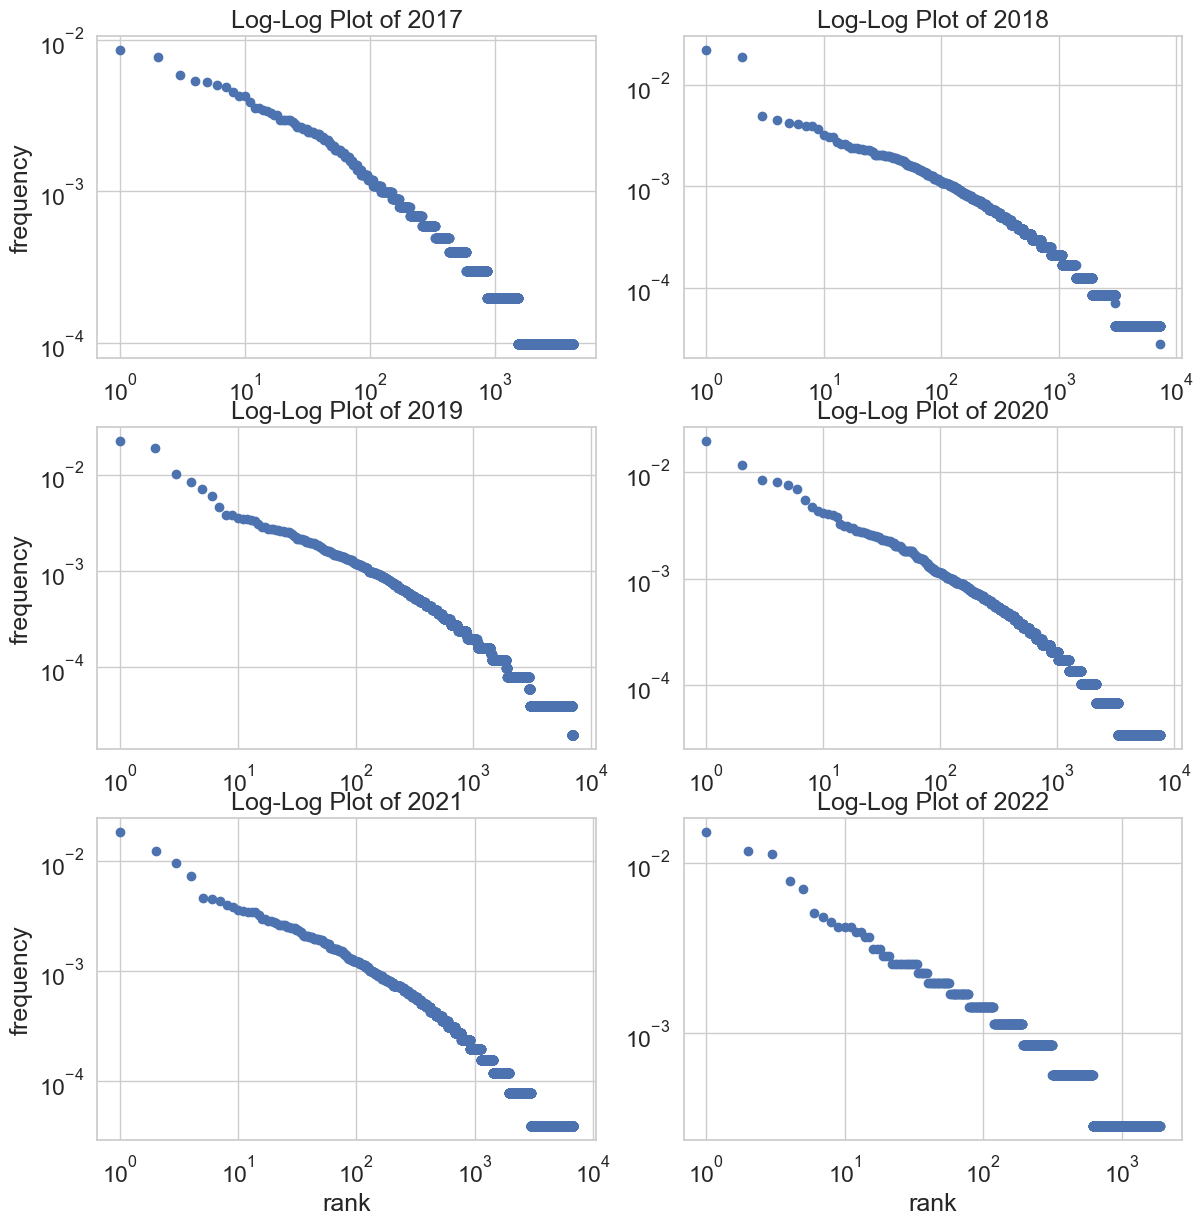

In [30]:
#  plot the loglog chart
import matplotlib.pyplot as plt
# plt.figure(figsize=(10,10), dpi=80)

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))
fig.tight_layout() # Or equivalently,  "plt.tight_layout()"


ax1 = plt.subplot(321)
plt.scatter(df_f2017['rank'],df_f2017['frequency'])
plt.ylabel('frequency')
plt.title('Log-Log Plot of 2017')
plt.yscale("log")
plt.xscale("log")

ax2 = plt.subplot(322)
plt.scatter(df_f2018['rank'],df_f2018['frequency'])
plt.title('Log-Log Plot of 2018')
plt.yscale("log")
plt.xscale("log")

ax3 = plt.subplot(323)
plt.scatter(df_f2019['rank'],df_f2019['frequency'])
plt.ylabel('frequency')
plt.title('Log-Log Plot of 2019')
plt.yscale("log")
plt.xscale("log")

ax4 = plt.subplot(324)
plt.scatter(df_f2020['rank'],df_f2020['frequency'])
plt.title('Log-Log Plot of 2020')
plt.yscale("log")
plt.xscale("log")

ax5 = plt.subplot(325)
plt.scatter(df_f2021['rank'],df_f2021['frequency'])
plt.xlabel('rank')
plt.ylabel('frequency')
plt.title('Log-Log Plot of 2021')
plt.yscale("log")
plt.xscale("log")

ax6 = plt.subplot(326)
plt.scatter(df_f2022['rank'],df_f2022['frequency'])
plt.xlabel('rank')
plt.title('Log-Log Plot of 2022')
plt.yscale("log")
plt.xscale("log")


## 5. Create bigram network graphs for each year

2017

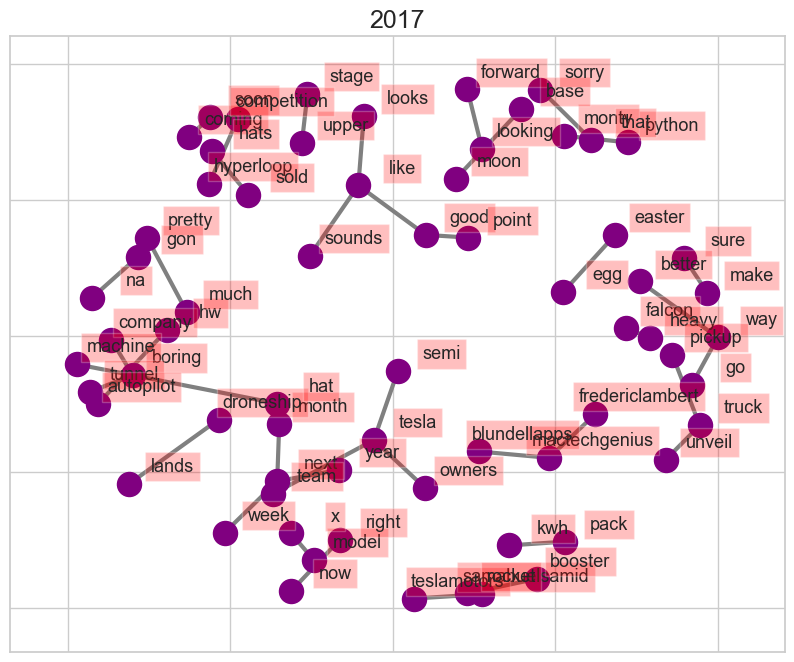

In [31]:
# count words for 2017
df_bi2017 = df_task2[df_task2['year'] == 2017]
df_bi2017= df_bi2017['Words'].str.cat(sep=' ')
wds_2017 = nltk.tokenize.word_tokenize(df_bi2017)

# Flatten list of bigrams
bigrm_2017 = list(nltk.bigrams(wds_2017))

# Create counter of words in bigrams, creat a dataframe
# bigram_2017 = pd.DataFrame(collections.Counter(bigrm_2017).items(),columns=['bigram', 'count']).sort_values(by='count',ascending=False)
bigram_2017 = pd.DataFrame(collections.Counter(bigrm_2017).most_common(40),columns=['bigram', 'count']).sort_values(by='count',ascending=False)

# Create dictionary of bigrams and their counts
d = bigram_2017.set_index('bigram').T.to_dict('records')
# Create network plot 
G = nx.Graph()
# Create connections between nodes
for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=(v * 10))
G.add_node("tesla", weight=100)



 # Plot networks
fig, ax = plt.subplots(figsize=(10, 8))
pos = nx.spring_layout(G,k=2,seed=5)

# Plot networks
nx.draw_networkx(G, pos,font_size=16,width=3,edge_color='grey',node_color='purple',
                 with_labels = False,
                 ax=ax)

# Create offset labels
for key, value in pos.items():
    x, y = value[0]+.135, value[1]+.045
    ax.text(x, y,s=key,bbox=dict(facecolor='red', alpha=0.25),
            horizontalalignment='center', fontsize=13)
plt.title('2017') 
plt.show()

2018

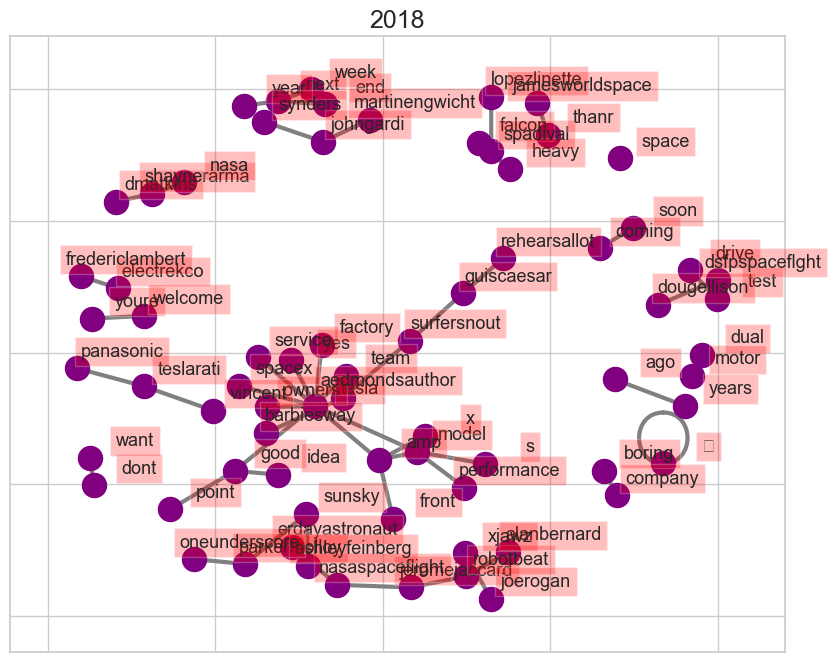

In [32]:
# count words 
df_bi2018 = df_task2[df_task2['year'] == 2018]
df_bi2018= df_bi2018['Words'].str.cat(sep=' ')
wds_2018 = nltk.tokenize.word_tokenize(df_bi2018)

# Flatten list of bigrams
bigrm_2018 = list(nltk.bigrams(wds_2018))

# Create counter of words in bigrams, creat a dataframe
bigrm_2018 = pd.DataFrame(collections.Counter(bigrm_2018).most_common(50),columns=['bigram', 'count']).sort_values(by='count',ascending=False)

# Create dictionary of bigrams and their counts
d = bigrm_2018.set_index('bigram').T.to_dict('records')
# Create network plot 
G = nx.Graph()
# Create connections between nodes
for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=(v * 10))
G.add_node("space", weight=100)



 # Plot networks
fig, ax = plt.subplots(figsize=(10, 8))
pos = nx.spring_layout(G,k=2,seed=5)

# Plot networks
nx.draw_networkx(G, pos,font_size=16,width=3,edge_color='grey',node_color='purple',
                 with_labels = False,
                 ax=ax)

# Create offset labels
for key, value in pos.items():
    x, y = value[0]+.135, value[1]+.045
    ax.text(x, y,s=key,bbox=dict(facecolor='red', alpha=0.25),
            horizontalalignment='center', fontsize=13)
plt.title('2018') 
plt.show()

2019

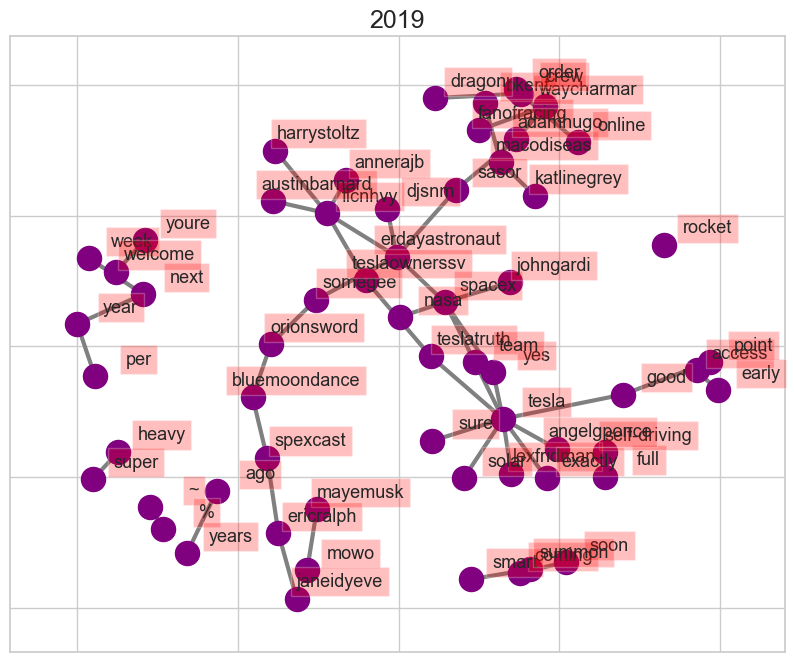

In [33]:
# count words 
df_bi2019 = df_task2[df_task2['year'] == 2019]
df_bi2019= df_bi2019['Words'].str.cat(sep=' ')
wds_2019 = nltk.tokenize.word_tokenize(df_bi2019)

# Flatten list of bigrams
bigrm_2019 = list(nltk.bigrams(wds_2019))

# Create counter of words in bigrams, creat a dataframe
bigrm_2019 = pd.DataFrame(collections.Counter(bigrm_2019).most_common(50),columns=['bigram', 'count']).sort_values(by='count',ascending=False)

# Create dictionary of bigrams and their counts
d = bigrm_2019.set_index('bigram').T.to_dict('records')
# Create network plot 
G = nx.Graph()
# Create connections between nodes
for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=(v * 10))
G.add_node("rocket", weight=100)



 # Plot networks
fig, ax = plt.subplots(figsize=(10, 8))
pos = nx.spring_layout(G,k=2,seed=5)

# Plot networks
nx.draw_networkx(G, pos,font_size=16,width=3,edge_color='grey',node_color='purple',
                 with_labels = False,
                 ax=ax)

# Create offset labels
for key, value in pos.items():
    x, y = value[0]+.135, value[1]+.045
    ax.text(x, y,s=key,bbox=dict(facecolor='red', alpha=0.25),
            horizontalalignment='center', fontsize=13)
plt.title('2019') 
plt.show()

2020

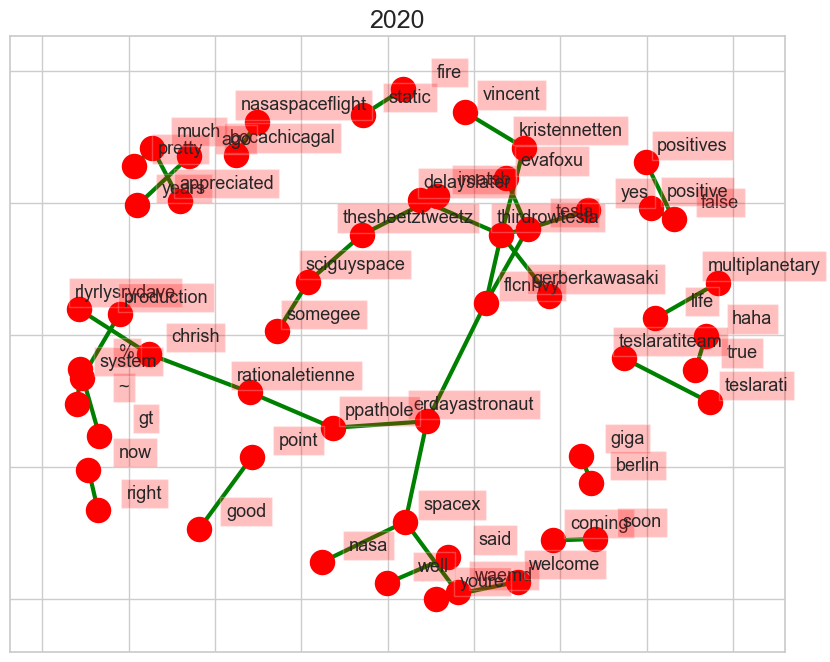

In [34]:
# count words 
df_bi2020 = df_task2[df_task2['year'] == 2020]
df_bi2020= df_bi2020['Words'].str.cat(sep=' ')
wds_2020 = nltk.tokenize.word_tokenize(df_bi2020)

# Flatten list of bigrams
bigrm_2020 = list(nltk.bigrams(wds_2020))

# Create counter of words in bigrams, creat a dataframe
bigrm_2020 = pd.DataFrame(collections.Counter(bigrm_2020).most_common(40),columns=['bigram', 'count']).sort_values(by='count',ascending=False)

# Create dictionary of bigrams and their counts
d = bigrm_2020.set_index('bigram').T.to_dict('records')
# Create network plot 
G = nx.Graph()
# Create connections between nodes
for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=(v * 10))
G.add_node("tesla", weight=100)

 # Plot networks
fig, ax = plt.subplots(figsize=(10, 8))
pos = nx.spring_layout(G,k=2,seed=5)

# Plot networks
nx.draw_networkx(G, pos,font_size=16,width=3,edge_color='green',node_color='red',
                 with_labels = False,
                 ax=ax)

# Create offset labels
for key, value in pos.items():
    x, y = value[0]+.135, value[1]+.045
    ax.text(x, y,s=key,bbox=dict(facecolor='red', alpha=0.25),
            horizontalalignment='center', fontsize=13)
plt.title('2020') 
plt.show()

2021

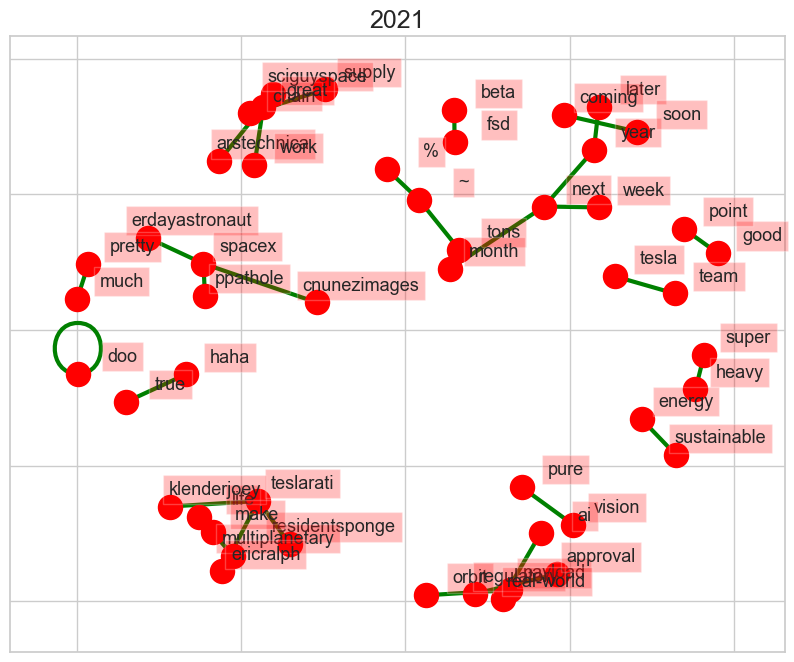

In [35]:
# count words 
df_bi2021 = df_task2[df_task2['year'] == 2021]
df_bi2021= df_bi2021['Words'].str.cat(sep=' ')
wds_2021 = nltk.tokenize.word_tokenize(df_bi2021)

# Flatten list of bigrams
bigrm_2021 = list(nltk.bigrams(wds_2021))

# Create counter of words in bigrams, creat a dataframe
bigrm_2021 = pd.DataFrame(collections.Counter(bigrm_2021).most_common(30),columns=['bigram', 'count']).sort_values(by='count',ascending=False)

# Create dictionary of bigrams and their counts
d = bigrm_2021.set_index('bigram').T.to_dict('records')
# Create network plot 
G = nx.Graph()
# Create connections between nodes
for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=(v * 10))
G.add_node("spacex", weight=100)

 # Plot networks
fig, ax = plt.subplots(figsize=(10, 8))
pos = nx.spring_layout(G,k=2,seed=5)

# Plot networks
nx.draw_networkx(G, pos,font_size=16,width=3,edge_color='green',node_color='red',
                 with_labels = False,
                 ax=ax)

# Create offset labels
for key, value in pos.items():
    x, y = value[0]+.135, value[1]+.045
    ax.text(x, y,s=key,bbox=dict(facecolor='red', alpha=0.25),
            horizontalalignment='center', fontsize=13)
plt.title('2021') 
plt.show()

2022

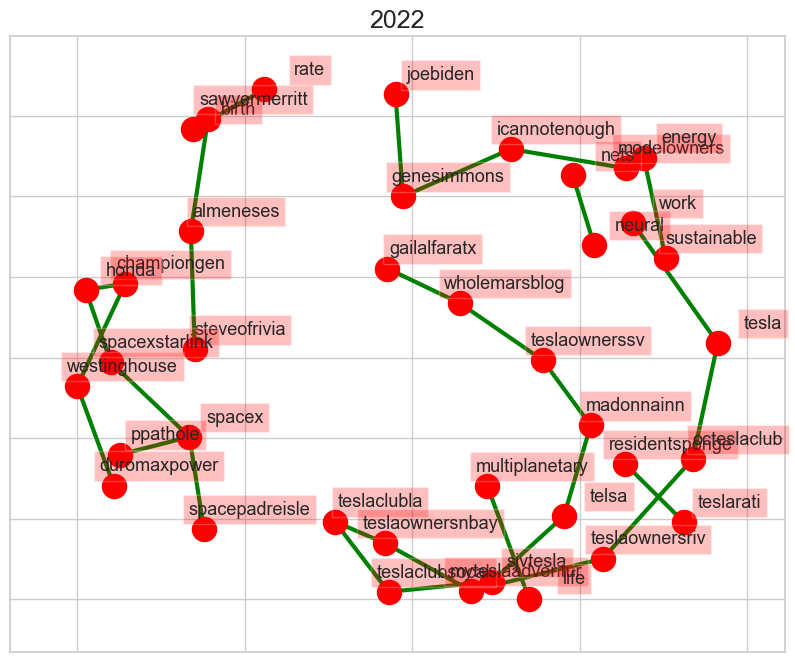

In [36]:
# count words 
df_bi2022 = df_task2[df_task2['year'] == 2022]
df_bi2022= df_bi2022['Words'].str.cat(sep=' ')
wds_2022 = nltk.tokenize.word_tokenize(df_bi2022)

# Flatten list of bigrams
bigrm_2022 = list(nltk.bigrams(wds_2022))

# Create counter of words in bigrams, creat a dataframe
bigrm_2022 = pd.DataFrame(collections.Counter(bigrm_2022).most_common(30),columns=['bigram', 'count']).sort_values(by='count',ascending=False)

# Create dictionary of bigrams and their counts
d = bigrm_2022.set_index('bigram').T.to_dict('records')
# Create network plot 
G = nx.Graph()
# Create connections between nodes
for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=(v * 10))
G.add_node("neural", weight=100)

 # Plot networks
fig, ax = plt.subplots(figsize=(10, 8))
pos = nx.spring_layout(G,k=2,seed=10)

# Plot networks
nx.draw_networkx(G, pos,font_size=16,width=3,edge_color='green',node_color='red',
                 with_labels = False,
                 ax=ax)

# Create offset labels
for key, value in pos.items():
    x, y = value[0]+.135, value[1]+.045
    ax.text(x, y,s=key,bbox=dict(facecolor='red', alpha=0.25),
            horizontalalignment='center', fontsize=13)
plt.title('2022') 
plt.show()